# Testing preprocessing techniques

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2023-04-02 12:16:52.151920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
tfds.__version__

'4.8.2'

In [6]:
dataset = tfds.load('bdd')

(720, 1280, 3)


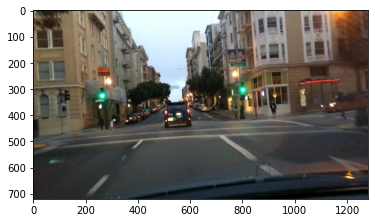

(720, 1280, 1)


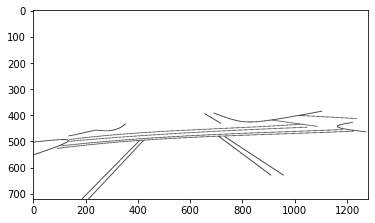

In [15]:
train_set = dataset['train']

for example in train_set:
    print(example['image'].shape)
    plt.imshow(example['image'])
    plt.show()
    print(example['label'].shape)
    plt.imshow(example['label'], cmap='gray')
    plt.show()
    break

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize)

for entry in dataset['train']:
  # print(entry['label'])
  lab = entry['label']
  # print(len(lab))
  # print(len(lab[lab==4]))

  print(np.count_nonzero(lab < 255))

  # Replace pixel values equal to 255 with 0, else 1
  # 255 pixel values arn't lane lines and other pixel
  # values are neglected since other subtasks of lane marking
  # are ignored.
  lab = np.where(lab == 255, 0, 1) 


  ''' MAY NEED THIS SINCE KERAS EXPECTS DATA AS TUPLES '''
  # dataset['train'].map(lambda items: (items['image'], items['label']))

  print(np.count_nonzero(lab == 1))

  break

## Preproc testing:

In [73]:
def preprocess(instance):
  # Potential dimmensionality reduction (consider different shapes):
  # input_image = tf.image.resize(datapoint['image'], (128, 128))

  # Normalize the input to 0-1 range
  input_image = tf.cast(instance['image'], tf.float32) / 255.0

  # Replace pixel values equal to 255 with 0, else 1
  # 255 pixel values arn't lane lines and other pixel
  # values are neglected since other subtasks of lane marking
  # are ignored.
  bitmask_label = tf.where(instance['label'] == 255, 1, 0) 

  return (input_image, bitmask_label)

def load_10k_data():
  # Retrieve custom tfds of BDD10k datatset
  dataset = tfds.load('bdd')

  train_set = dataset['train'].map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  validate_set = dataset['test'].map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  test_set = dataset['validate'].map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  
  return train_set, validate_set, test_set


Manual 'preprocess' function testing:

Number of lane line pixels  17021
Number of lane line pixels after preprocessing 17021


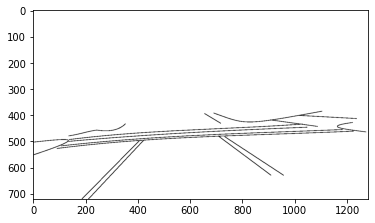

In [80]:
data = tfds.load('bdd')
train = data['train']

for item in train:
  print("Number of lane line pixels ", np.count_nonzero(item['label'] < 255))
  image, label = preprocess(item)
  print("Number of lane line pixels after preprocessing", np.count_nonzero(label == 0))
  plt.imshow(label, cmap="gray")
  break

Number of lane line pixels after preprocessing 17021


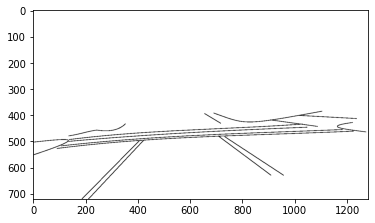

In [79]:
train, valid, test = load_10k_data()

for item in train:
  print("Number of lane line pixels after preprocessing", np.count_nonzero(item[1] == 0))
  plt.imshow(item[1], cmap="gray")
  break